# Regresión lineal simple en Python
## El paquete *statsmodel* para la regresión lineal

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


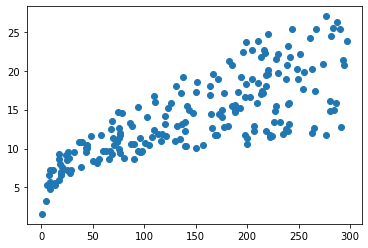

In [3]:
plt.scatter(x = data["TV"], y = data["Sales"])
plt.show()

In [4]:
lm = smf.ols(formula = "Sales ~ TV", data = data).fit()

In [5]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [6]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [7]:
lm.rsquared

0.611875050850071

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        15:58:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

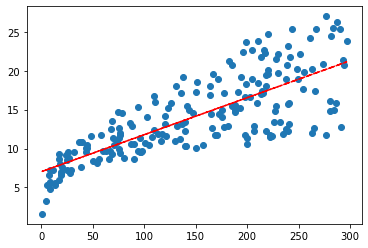

In [10]:
plt.scatter(x = data["TV"], y = data["Sales"])
plt.plot(data["TV"],sales_pred, color = "red", linestyle = "--")
plt.show()

In [11]:
data["Sales_pred"] = lm.params[0] + lm.params[1]*data["TV"]

In [12]:
SSD = sum((data["Sales"] - data["Sales_pred"]) ** 2)
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656368650463

In [13]:
sales_mean = np.mean(data["Sales"])
error = RSE/sales_mean
error

0.23238768897489478

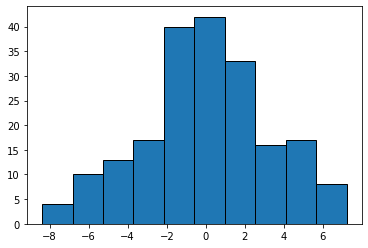

In [14]:
plt.hist((data["Sales"] - data["Sales_pred"]), edgecolor = "black")
plt.show()

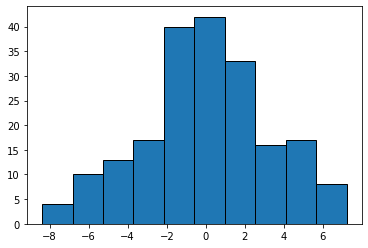

In [15]:
plt.hist(lm.resid, edgecolor = "black")
plt.show()

# Regresión lineal múltiple en Python
## El paquete *statsmodel* para regresión múltiple

* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Newspaper + Radio
* Sales ~ TV + Newspaper + Radio

Empezar modelo con todas e ir eliminando las variables con mayor $\text{p}_{\text{val}}$ (selección hacia atrás).

In [16]:
lm2 = smf.ols(formula = "Sales ~ TV + Newspaper", data = data).fit()
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [17]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           3.95e-45
Time:                        15:58:39   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
sales_pred_2 = lm2.predict(data[["TV","Newspaper"]])

In [19]:
SSD = sum((data["Sales"] - sales_pred_2) ** 2)
RSE = np.sqrt(SSD/(len(data)-2-1))
error = RSE/sales_mean
(SSD, RSE, error)

(1918.5618118968273, 3.120719860252885, 0.22255089037282116)

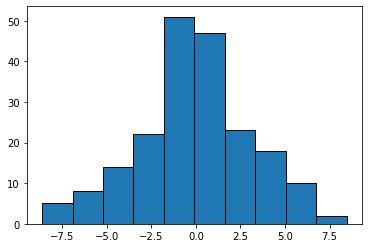

In [20]:
plt.hist(lm2.resid, edgecolor = "black")
plt.show()

In [21]:
# Tercer modelo: radio
lm3 = smf.ols(formula = "Sales ~ TV + Radio", data = data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           4.83e-98
Time:                        15:58:39   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
sales_pred_3 = lm3.predict(data[["TV","Radio"]])
SSD = sum((data["Sales"] - sales_pred_3) ** 2)
RSE = np.sqrt(SSD/(len(data)-2-1))
error = RSE/sales_mean
(SSD, RSE, error)

(556.9139800676182, 1.681360912508001, 0.11990450436855059)

In [23]:
lm4 = smf.ols(formula = "Sales ~ TV + Radio + Newspaper", data = data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        15:58:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
sales_pred_4 = lm4.predict(data[["TV","Radio","Newspaper"]])
SSD = sum((data["Sales"] - sales_pred_4) ** 2)
RSE = np.sqrt(SSD/(len(data)-2-1))
error = RSE/sales_mean
(SSD, RSE, error)

(556.825262902187, 1.681226985617487, 0.11989495351167671)

## Multicolinealidad

Factor de inflación de la varianza ayuda a observar la existencia de multicolinealidad problemática.
* Igual a uno: No hay correlación.
* Menor a cinco: Correlación moderada
* Mayor a cinco: Altamente correlacionadas

$\text{Newspaper} \sim \text{TV} + \text{Radio} \to R^2 \ , \ \text{VIF} = \frac{1}{1-R^2}$

In [31]:
lm_news = smf.ols(formula = "Newspaper ~ TV + Radio", data = data).fit()
VIF_news = 1/(1-lm_news.rsquared)

lm_tv = smf.ols(formula = "TV ~ Newspaper + Radio", data = data).fit()
VIF_tv = 1/(1-lm_tv.rsquared)

lm_radio = smf.ols(formula = "Radio ~ TV + Newspaper", data = data).fit()
VIF_radio = 1/(1-lm_radio.rsquared)

print("VIF Newspaper: ",VIF_news,"\nVIF TV: ", vif)

VIF Newspaper:  1.1451873787239286
